# Darts problem. Multiclass Classification

You're going to build a model that predicts who threw which dart only based on where that dart landed! (That is the dart's x and y coordinates.)

This problem is a multi-class classification problem since each dart can only be thrown by one of 4 competitors. So classes are mutually exclusive, and therefore we can build a neuron with as many output as competitors and use the softmax activation function to achieve a total sum of probabilities of 1 over all competitors.

Keras Sequential model and Dense layer are already loaded for you to use.

In [1]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# setting seaborn style 
sns.set_style('darkgrid')

In [2]:
# Load darts dataset
darts= pd.read_csv("data/darts.csv")

darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


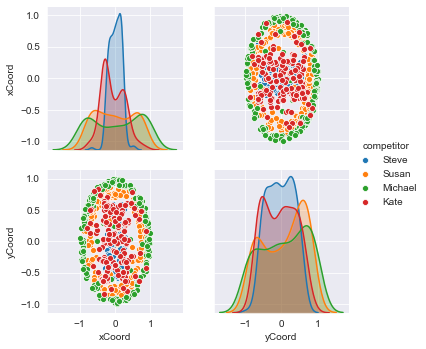

In [3]:
sns.pairplot(darts, hue="competitor");

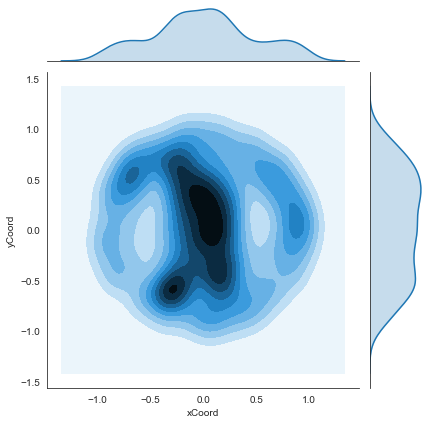

In [4]:
with sns.axes_style("white"):
    sns.jointplot(x='xCoord', y='yCoord', kind='kde', data=darts);

In [5]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes

In [6]:
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,2
1,0.476027,-0.306763,3
2,0.003175,-0.980736,1
3,0.294078,0.267566,0
4,-0.051120,0.598946,2


In [7]:
# splitting darts into Train and Test (80/20 stratify)

X = darts.iloc[:, :-1].values
y = darts["competitor"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=12345, stratify=y)

In [8]:
# Instantiate a sequential model
model = Sequential()

In [9]:
  # Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

In [10]:
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))

In [11]:
# Compile your model using categorical_crossentropy loss
model.compile(loss='sparse_categorical_crossentropy', #'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# Display a summary of your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
Total params: 10,852
Trainable params: 10,852
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train your model on the training data for 200 epochs
hist = model.fit(X_train, y_train, epochs=200, verbose=0, validation_split=0.2);

In [14]:
# Preparing data for seaborn plots

new_hist = hist.history.copy()
new_hist.update({'epochs': [i for i in range(200)]})
df = pd.melt(pd.DataFrame(new_hist), id_vars='epochs')

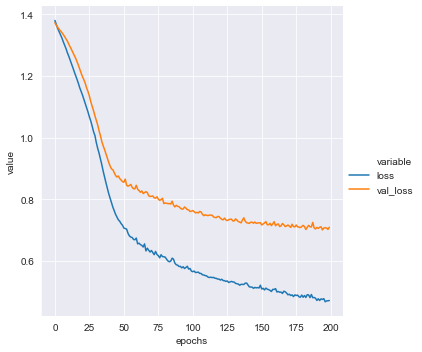

In [15]:
# Training ploting

mask = df.variable.isin(['loss', 'val_loss'])

sns.relplot(x='epochs', y='value', hue='variable',
             dashes=False, markers=True, kind="line", data=df[mask]);

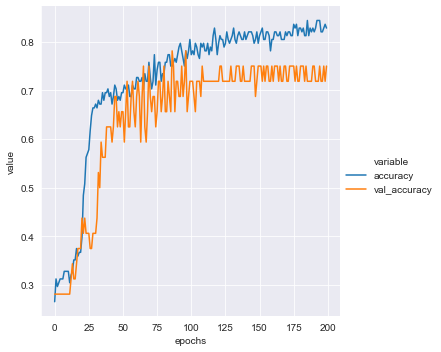

In [16]:
# Training ploting

mask = df.variable.isin(['accuracy', 'val_accuracy'])

sns.relplot(x='epochs', y='value', hue='variable',
             dashes=False, markers=True, kind="line", data=df[mask]);

In [17]:
# Evaluate your model accuracy on the test data
accuracy = model.evaluate(X_train, y_train, verbose=0)[1]

In [18]:
# Print accuracy
print('Accuracy:', accuracy)

Accuracy: 0.8125


In [19]:
# Predict on coords_small_test
preds = model.predict(X_test)

In [21]:
# Print first preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds[:10]):
    print("{} | {}".format(pred, y_test[i]))

Raw Model Predictions                         | True labels
[4.0860442e-03 8.5374928e-01 1.0469180e-07 1.4216457e-01] | 1
[1.8233408e-03 9.7622615e-01 7.9659786e-12 2.1950461e-02] | 1
[6.7589566e-02 1.1609392e-05 9.1396600e-01 1.8432904e-02] | 2
[1.2507503e-01 2.2367192e-07 8.7373912e-01 1.1857232e-03] | 2
[3.6270404e-01 1.2310824e-04 5.1386791e-01 1.2330486e-01] | 2
[5.9977854e-03 9.2682803e-01 2.4957938e-09 6.7174248e-02] | 1
[4.0526918e-01 2.7023139e-04 4.5028293e-01 1.4417766e-01] | 0
[9.6899226e-02 2.3837844e-02 2.4786573e-06 8.7926048e-01] | 3
[5.6300953e-02 3.4424314e-01 1.5640508e-05 5.9944028e-01] | 3
[2.4376319e-01 3.8146439e-07 7.5364053e-01 2.5959562e-03] | 2
